# 버전 설정
> `model_save_root` = 저장할 폴더 경로(이 아래에 "model_save_root/lags/"에 저장됨")</br>
> `lags` = window sliding 개수 </br>
> `version` = Model 버전


In [ ]:
import numpy as np
import os
model_save_root = "sl_model/"
lags = "1"
version = "31"

## 구글 Drive 저장 시 사용
- 구글 Drive 마운트 코드

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 데이터 셋 경로 설정
- 데이터 셋 및 label 불러오기

In [ ]:
file_root = f'dataset/'
file_list = os.listdir(file_root)
actions = np.load(file_root+'labels.npy')
print(file_list)
print(actions)

['seq_20231121_수제비 (11).npy', 'seq_20231121_. (14).npy', 'seq_20231121_커피 (27).npy', 'seq_20231121_먹다 (10).npy', 'seq_20231121_따뜻하다 (29).npy', 'seq_20231121_가다 (5).npy', 'seq_20231121_먹다 (6).npy', 'seq_20231121_수제비 (26).npy', 'seq_20231121_읽다 (28).npy', 'seq_20231121_가다 (6).npy', 'seq_20231121_가다 (22).npy', 'seq_20231121_동대문 (18).npy', 'seq_20231121_수제비 (21).npy', 'seq_20231121_먹다 (8).npy', 'seq_20231121_읽다 (6).npy', 'seq_20231121_따뜻하다 (1).npy', 'seq_20231121_수제비 (25).npy', 'seq_20231121_수제비 (28).npy', 'seq_20231121_읽다 (18).npy', 'seq_20231121_커피 (13).npy', 'seq_20231121_커피 (9).npy', 'seq_20231121_책 (5).npy', 'seq_20231121_따뜻하다 (2).npy', 'seq_20231121_동대문 (12).npy', 'seq_20231121_오늘 (2).npy', 'seq_20231121_읽다 (22).npy', 'seq_20231121_읽다 (26).npy', 'seq_20231121_. (18).npy', 'seq_20231121_수제비 (6).npy', 'seq_20231121_따뜻하다 (3).npy', 'seq_20231121_. (25).npy', 'seq_20231121_. (28).npy', 'seq_20231121_읽다 (31).npy', 'seq_20231121_오늘 (24).npy', 'seq_20231121_수제비 (4).npy', 'seq_20231121_먹다 (13

In [ ]:
files = []
for f in file_list:
    if f[:3] == 'seq':
        files.append(f)
len(files)
files.sort()
files

['seq_20231121_. (1).npy',
 'seq_20231121_. (10).npy',
 'seq_20231121_. (11).npy',
 'seq_20231121_. (12).npy',
 'seq_20231121_. (13).npy',
 'seq_20231121_. (14).npy',
 'seq_20231121_. (15).npy',
 'seq_20231121_. (16).npy',
 'seq_20231121_. (17).npy',
 'seq_20231121_. (18).npy',
 'seq_20231121_. (19).npy',
 'seq_20231121_. (2).npy',
 'seq_20231121_. (20).npy',
 'seq_20231121_. (21).npy',
 'seq_20231121_. (22).npy',
 'seq_20231121_. (23).npy',
 'seq_20231121_. (24).npy',
 'seq_20231121_. (25).npy',
 'seq_20231121_. (26).npy',
 'seq_20231121_. (27).npy',
 'seq_20231121_. (28).npy',
 'seq_20231121_. (29).npy',
 'seq_20231121_. (3).npy',
 'seq_20231121_. (30).npy',
 'seq_20231121_. (4).npy',
 'seq_20231121_. (5).npy',
 'seq_20231121_. (6).npy',
 'seq_20231121_. (7).npy',
 'seq_20231121_. (8).npy',
 'seq_20231121_. (9).npy',
 'seq_20231121_가다 (1).npy',
 'seq_20231121_가다 (10).npy',
 'seq_20231121_가다 (11).npy',
 'seq_20231121_가다 (12).npy',
 'seq_20231121_가다 (13).npy',
 'seq_20231121_가다 (14).np

# 데이터 셋 구성
- 예시 (이전코드)
```python
    actions = [
        'come',
        'away',
        'spin'
    ]

    data = np.concatenate([
        np.load('dataset/seq_come_1627646273.npy'),
        np.load('dataset/seq_away_1627646273.npy'),
        np.load('dataset/seq_spin_1627646273.npy')
    ], axis=0)

    data.shape
```

In [ ]:
print(files)
# files.pop(70)

idx= 0
zeros = []
for f in files:
    npf = np.load(file_root+f)
    print(f'{idx}번째 : file name is {f} - {npf.shape}')
    if not npf.any():
        zeros.append(idx)
    idx += 1
print(zeros)
for npf in range(len(zeros)-1,-1,-1):
    files.pop(zeros[npf])
data = np.concatenate([np.load(file_root+f) for f in files], axis=0)
print(data.shape)


['seq_20231121_. (1).npy', 'seq_20231121_. (10).npy', 'seq_20231121_. (11).npy', 'seq_20231121_. (12).npy', 'seq_20231121_. (13).npy', 'seq_20231121_. (14).npy', 'seq_20231121_. (15).npy', 'seq_20231121_. (16).npy', 'seq_20231121_. (17).npy', 'seq_20231121_. (18).npy', 'seq_20231121_. (19).npy', 'seq_20231121_. (2).npy', 'seq_20231121_. (20).npy', 'seq_20231121_. (21).npy', 'seq_20231121_. (22).npy', 'seq_20231121_. (23).npy', 'seq_20231121_. (24).npy', 'seq_20231121_. (25).npy', 'seq_20231121_. (26).npy', 'seq_20231121_. (27).npy', 'seq_20231121_. (28).npy', 'seq_20231121_. (29).npy', 'seq_20231121_. (3).npy', 'seq_20231121_. (30).npy', 'seq_20231121_. (4).npy', 'seq_20231121_. (5).npy', 'seq_20231121_. (6).npy', 'seq_20231121_. (7).npy', 'seq_20231121_. (8).npy', 'seq_20231121_. (9).npy', 'seq_20231121_가다 (1).npy', 'seq_20231121_가다 (10).npy', 'seq_20231121_가다 (11).npy', 'seq_20231121_가다 (12).npy', 'seq_20231121_가다 (13).npy', 'seq_20231121_가다 (14).npy', 'seq_20231121_가다 (15).npy', 'se

# 데이터 입력 전처리
- 예시 (이전코드)
```python
    x_data = data[:, :, :-1]
    labels = data[:, 0, -1]

    print(x_data.shape)
    print(labels.shape)
```

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
# print(*labels)
print(*labels)
print(len(actions))

(13745, 1, 174)
(13745,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [ ]:
from tensorflow.keras.utils import to_categorical
# actions
# print(labels.shape)
# labels[42][-1]

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(13745, 10)

# Test 데이터 셋과 Train 데이터 셋 구분

In [ ]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float16)
y_data = y_data.astype(np.float16)
print(x_data.shape)
print(y_data.shape)
# x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 178)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), 8)
x_train, y_train = x_data, y_data
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(13745, 1, 174)
(13745, 10)
(12370, 1, 174) (12370, 10)
(1375, 1, 174) (1375, 10)


# **Train**
- V1: dataset = float 16, epoach = 100
- V2: dataset = float 16, epoach - 150
- V3: dataset = float 16, epoach - 200
- V4: dataset = float 32, epoach - 100
- V5: dataset = float 32, epoach - 150
- V6: dataset = float 32, epoach - 200


## Dataset float 16, epoach 160



In [ ]:
# Gesture 모델 원본
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Flatten

# # version 1
# model = Sequential([
#     LSTM(64, activation='relu', input_shape=x_train.shape[1:3], stateful=True, return_sequences=True),
#     Dense(32, activation='relu'),
#     Dense(len(actions), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# model.summary()

In [ ]:
# 논문 기반 모델

import tensorflow as tf
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(1,174), name='input'),
tf.keras.layers.LSTM(512, time_major=False,
 return_sequences=True),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(256, activation=tf.nn.relu),
tf.keras.layers.Dense(256, activation=tf.nn.relu),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(len(actions), activation=tf.nn.softmax,
 name='output')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 512)            1406976   
                                                                 
 dense (Dense)               (None, 1, 1024)           525312    
                                                                 
 dropout (Dropout)           (None, 1, 1024)           0         
                                                                 
 dense_1 (Dense)             (None, 1, 256)            262400    
                                                                 
 dense_2 (Dense)             (None, 1, 256)            65792     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 output (Dense)              (None, 10)                2

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=160,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_2_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/160
385/387 [============================>.] - ETA: 0s - loss: 0.1003 - acc: 0.9710
Epoch 1: val_acc improved from -inf to 0.95709, saving model to sl_model/1/sl_model_31_2_1.h5
387/387 [==============================] - 13s 9ms/step - loss: 0.1003 - acc: 0.9710 - val_loss: 0.1142 - val_acc: 0.9571 - lr: 0.0010
Epoch 2/160
 11/387 [..............................] - ETA: 2s - loss: 0.0713 - acc: 0.9716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


379/387 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9823
Epoch 2: val_acc improved from 0.95709 to 0.99055, saving model to sl_model/1/sl_model_31_2_1.h5
387/387 [==============================] - 3s 7ms/step - loss: 0.0593 - acc: 0.9825 - val_loss: 0.0340 - val_acc: 0.9905 - lr: 0.0010
Epoch 3/160
382/387 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9872
Epoch 3: val_acc improved from 0.99055 to 0.99636, saving model to sl_model/1/sl_model_31_2_1.h5
387/387 [==============================] - 3s 9ms/step - loss: 0.0430 - acc: 0.9873 - val_loss: 0.0139 - val_acc: 0.9964 - lr: 0.0010
Epoch 4/160
383/387 [============================>.] - ETA: 0s - loss: 0.0319 - acc: 0.9900
Epoch 4: val_acc did not improve from 0.99636
387/387 [==============================] - 3s 9ms/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0217 - val_acc: 0.9935 - lr: 0.0010
Epoch 5/160
384/387 [============================>.] - ETA: 0s - loss: 0.0309 - acc: 0.9903
Ep

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_1_{lags}.h5')

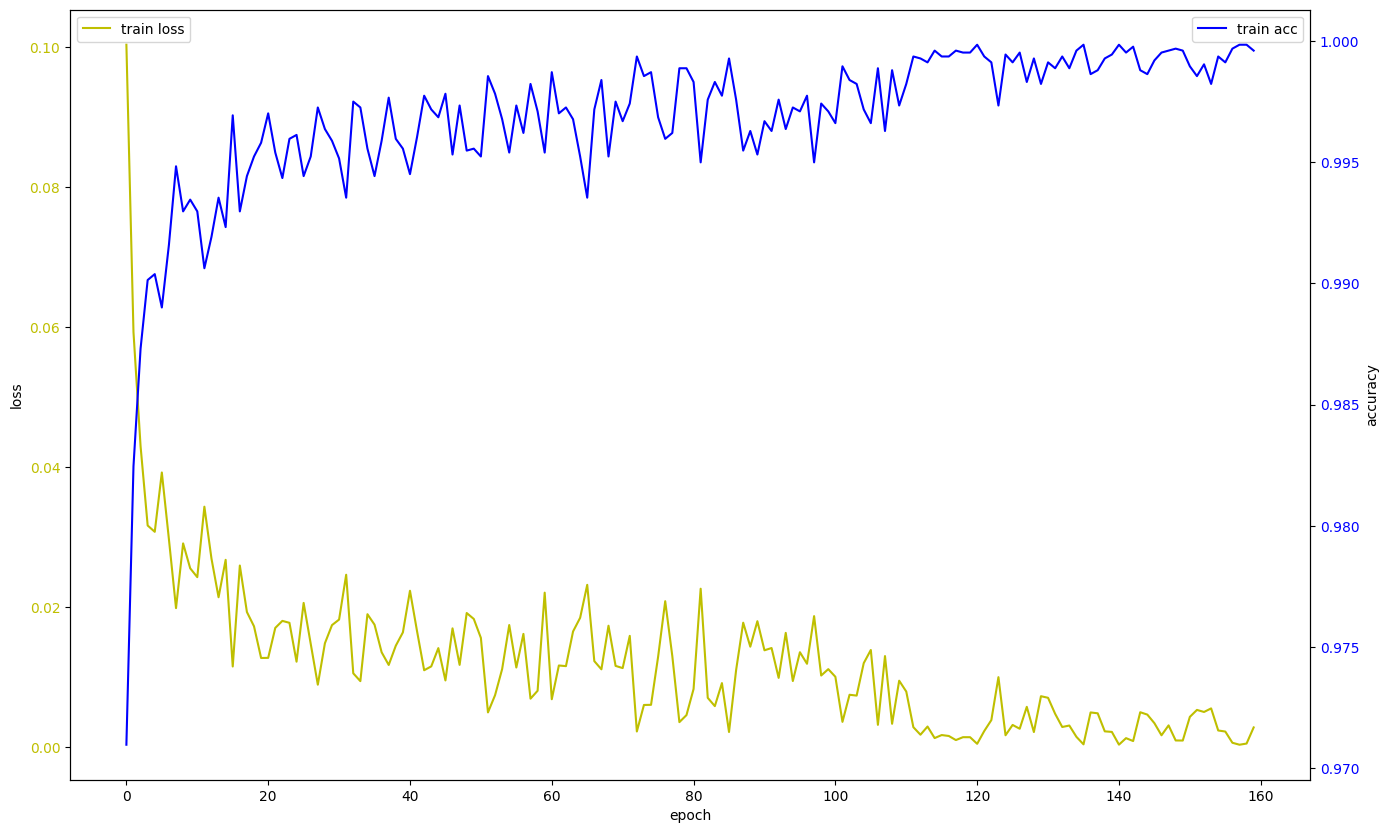

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
loss_ax.tick_params(axis='y', labelcolor='y')
acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')
acc_ax.tick_params(axis='y', labelcolor='b')

plt.show()
# acc_ax.savefig("model_v14_1_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_1_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

# Test

In [ ]:
#  actions, data
test_root = f'test_dataset/v{version}/{lags}/'
file_list = os.listdir(test_root)
# actions = np.load(test_root+'labels.npy')
print(file_list)
print(actions)
# actions

['seq_20231126_너 같이 가다 물음표 (2).npy', 'seq_20231126_너 같이 가다 물음표 (1).npy']
['' '.' '가다' '너' '동대문' '따뜻하다' '마시다' '먹다' '물음표' '수제비' '오늘' '읽다' '책' '커피']


In [ ]:
files = []
for f in file_list:
    if f[:3] == 'seq':
        files.append(f)
len(files)
files.sort()
files

['seq_20231126_너 같이 가다 물음표 (1).npy', 'seq_20231126_너 같이 가다 물음표 (2).npy']

In [ ]:
import tensorflow as tf
import pandas as pd
test_list = os.listdir(test_root)
test = []
label_dic = {}
for idx in range(len(actions)):
    label_dic[idx] = actions[idx]
print(test_list)
print(label_dic)
for test_data in test_list:
    output = []
    # test.append(np.load('test_data/'+test_data))
    if test_data[-3:] == "npy":
        t= np.load(test_root+test_data)
        test_x = t.astype(np.float32)
        print(test_x.shape)
        print(test_data[:-4])
        y = model.predict(test_x)
        print(y)
        df = pd.DataFrame(data=y, columns=actions)
        df.to_csv(f"charts/{lags}/model_python_h5_{test_data[16:-4]}.csv",index=True, encoding='utf-8-sig')

['seq_20231126_동대문 가다 수제비 먹다 (6).npy', 'seq_20231126_동대문 가다 수제비 먹다 (7).npy', 'seq_20231126_동대문 가다 수제비 먹다 (4).npy', 'seq_20231126_동대문 가다 수제비 먹다 (1).npy', 'seq_20231126_동대문 가다 수제비 먹다 (2).npy', 'seq_20231126_동대문 가다 수제비 먹다 (3).npy', 'seq_20231126_동대문 가다 수제비 먹다 (5).npy']
{0: '가다', 1: '동대문', 2: '따뜻하다', 3: '먹다', 4: '수제비', 5: '오늘', 6: '', 7: '.', 8: '너', 9: '마시다', 10: '물음표', 11: '읽다', 12: '책', 13: '커피'}
(214, 30, 178)
seq_20231126_동대문 가다 수제비 먹다 (6)
7/7 [==============================] - 2s 109ms/step
[[9.1757152e-05 1.7042652e-02 1.4528014e-06 ... 1.3992349e-04
  2.1607582e-05 1.2702240e-08]
 [3.1142161e-05 2.0246569e-02 1.1971676e-06 ... 3.8632262e-04
  7.7604254e-06 8.7938510e-09]
 [2.4010271e-06 2.8690360e-02 5.1066297e-07 ... 2.5829099e-04
  1.9885824e-06 2.2619677e-09]
 ...
 [4.3853894e-09 2.3530301e-14 5.7326602e-11 ... 2.1305649e-16
  3.9043705e-08 5.0379394e-18]
 [1.4878300e-09 6.0730403e-15 4.2094096e-11 ... 1.3993084e-17
  2.1281158e-08 3.5193355e-18]
 [2.8499700e-10 2.0837572e-15 2.

In [ ]:
import tensorflow as tf

test_list = os.listdir(test_root)
test = []
label_dic = {}
for idx in range(len(actions)):
    label_dic[idx] = actions[idx]
print(test_list)
print(label_dic)
# actions =  {'': 0, '가다': 1, '감사합니다': 2, '강아지': 3, '덥다': 4, '돼지': 5, '먹다': 6, '무엇': 7, '반갑다': 8, '석사': 9, '아침': 10, '안녕하세요': 11, '연구': 12, '오늘': 13, '오후': 14, '저녁': 15, '졸리다': 16, '좋다': 17, '질문': 18, '할아버지': 19}
# print(actions)
outputs = []
for test_data in test_list:
    output = []
    # test.append(np.load('test_data/'+test_data))
    if test_data[-3:] == "npy":
        t= np.load(test_root+test_data)
        test_x = t.astype(np.float32)
        print(test_data[:-4])
        # interpreter = tf.lite.Interpreter(model_path="sl_model/1/sl_model_v25_1_1.tflite")
        interpreter = tf.lite.Interpreter(model_content=tflite_model)
        interpreter.allocate_tensors()
        # Get input and output tensors.
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        print(input_details)
        print(output_details)
        # Test the model on random input data.
        input_shape = input_details[0]['shape']
        for index in range(len(test_x)):
            interpreter.set_tensor(input_details[0]['index'], [test_x[index]])

            interpreter.invoke()


            # The function `get_tensor()` returns a copy of the tensor data.
            # Use `tensor()` in order to get a pointer to the tensor.
            output_data = interpreter.get_tensor(output_details[0]['index'])
            output.append(*output_data)
            print(output_data)
        outputs.append(output)
        print()


['seq_20231126_너 같이 가다 물음표 (2).npy', 'seq_20231126_너 같이 가다 물음표 (1).npy']
{0: '', 1: '.', 2: '가다', 3: '너', 4: '동대문', 5: '따뜻하다', 6: '마시다', 7: '먹다', 8: '물음표', 9: '수제비', 10: '오늘', 11: '읽다', 12: '책', 13: '커피'}
seq_20231126_너 같이 가다 물음표 (2)
[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1,   1, 178], dtype=int32), 'shape_signature': array([ -1,   1, 178], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 72, 'shape': array([ 1, 14], dtype=int32), 'shape_signature': array([-1, 14], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[1.8784755e-12 9.8353591e-12 9.9999261

In [ ]:
import pandas as pd
print(actions)
print(len(outputs))
for idx in range(len(outputs)):
    df = pd.DataFrame(data=outputs[idx], columns=actions)
    df.to_csv(f"charts/v{version}/{lags}/model_v{version}_{lags}_{file_list[idx][8:-4]}.csv",index=True, encoding='utf-8-sig')

['' '.' '가다' '너' '동대문' '따뜻하다' '마시다' '먹다' '물음표' '수제비' '오늘' '읽다' '책' '커피']
2


## V1

In [ ]:
# Gesture 모델 원본
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

# version 1
model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], stateful=True, return_sequences=True),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_2_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_1_{lags}.h5')

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_1_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

## Version 2


In [ ]:
# version 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                65280     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 18)                594       
                                                                 
Total params: 67954 (265.45 KB)
Trainable params: 67954 (265.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_2_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
703/709 [============================>.] - ETA: 0s - loss: 0.6320 - acc: 0.8858
Epoch 1: val_acc improved from -inf to 0.96033, saving model to sl_model/3/sl_model_14_2_3.h5
709/709 [==============================] - 8s 9ms/step - loss: 0.6273 - acc: 0.8867 - val_loss: 0.1536 - val_acc: 0.9603 - lr: 0.0010
Epoch 2/150
 15/709 [..............................] - ETA: 5s - loss: 0.1319 - acc: 0.9750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


706/709 [============================>.] - ETA: 0s - loss: 0.1142 - acc: 0.9676
Epoch 2: val_acc improved from 0.96033 to 0.96509, saving model to sl_model/3/sl_model_14_2_3.h5
709/709 [==============================] - 8s 11ms/step - loss: 0.1142 - acc: 0.9677 - val_loss: 0.1096 - val_acc: 0.9651 - lr: 0.0010
Epoch 3/150
706/709 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9807
Epoch 3: val_acc improved from 0.96509 to 0.98374, saving model to sl_model/3/sl_model_14_2_3.h5
709/709 [==============================] - 6s 8ms/step - loss: 0.0673 - acc: 0.9808 - val_loss: 0.0589 - val_acc: 0.9837 - lr: 0.0010
Epoch 4/150
706/709 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9852
Epoch 4: val_acc improved from 0.98374 to 0.98453, saving model to sl_model/3/sl_model_14_2_3.h5
709/709 [==============================] - 8s 11ms/step - loss: 0.0515 - acc: 0.9853 - val_loss: 0.0571 - val_acc: 0.9845 - lr: 0.0010
Epoch 5/150
705/709 [====================

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_2_{lags}.h5')

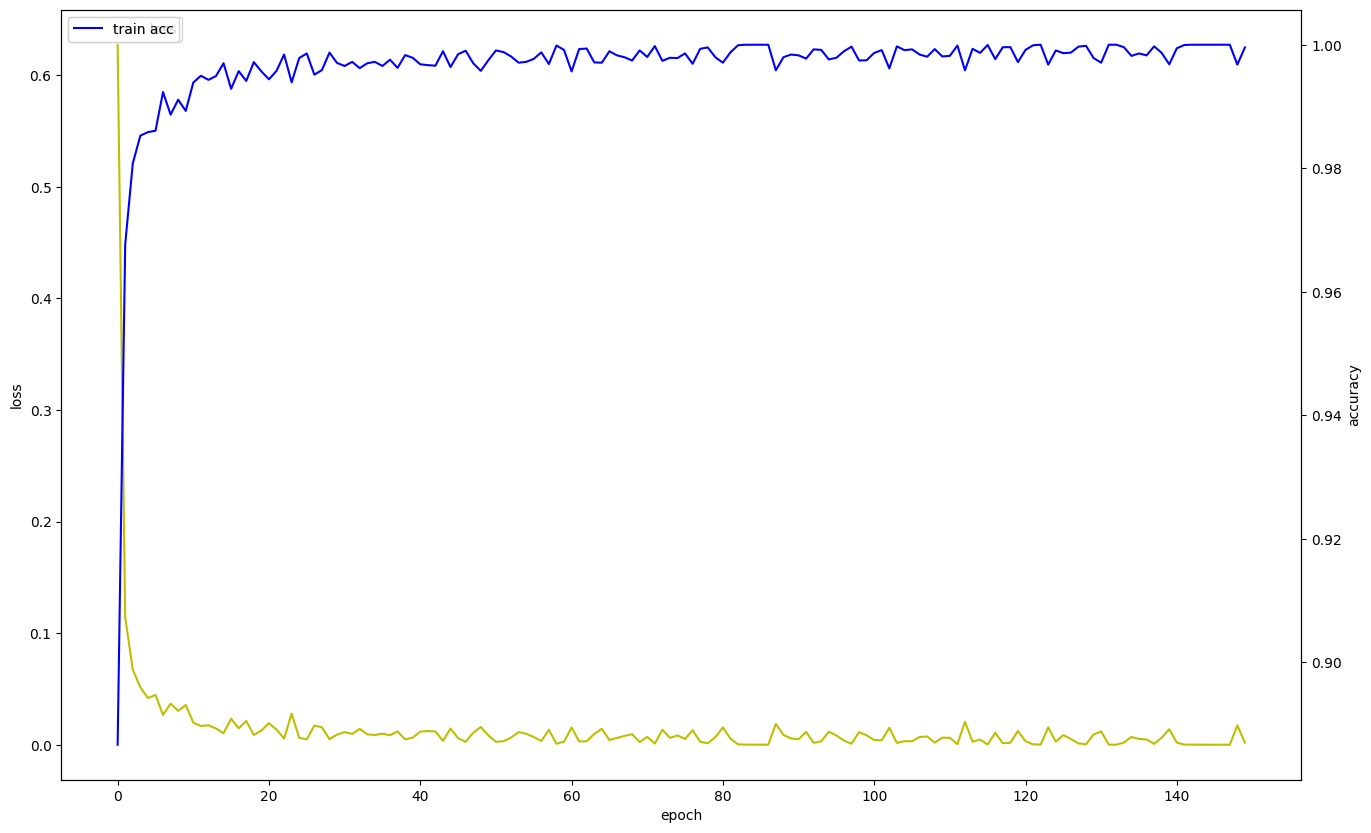

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_2_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# version 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                65280     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 18)                594       
                                                                 
Total params: 67954 (265.45 KB)
Trainable params: 67954 (265.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_3_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
703/709 [============================>.] - ETA: 0s - loss: 0.6668 - acc: 0.8774
Epoch 1: val_acc improved from -inf to 0.95756, saving model to sl_model/3/sl_model_14_3_3.h5
709/709 [==============================] - 10s 11ms/step - loss: 0.6623 - acc: 0.8781 - val_loss: 0.1433 - val_acc: 0.9576 - lr: 0.0010
Epoch 2/200
 22/709 [..............................] - ETA: 5s - loss: 0.1029 - acc: 0.9759

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


709/709 [==============================] - ETA: 0s - loss: 0.0878 - acc: 0.9736
Epoch 2: val_acc improved from 0.95756 to 0.98056, saving model to sl_model/3/sl_model_14_3_3.h5
709/709 [==============================] - 6s 9ms/step - loss: 0.0878 - acc: 0.9736 - val_loss: 0.0624 - val_acc: 0.9806 - lr: 0.0010
Epoch 3/200
703/709 [============================>.] - ETA: 0s - loss: 0.0691 - acc: 0.9803
Epoch 3: val_acc improved from 0.98056 to 0.98136, saving model to sl_model/3/sl_model_14_3_3.h5
709/709 [==============================] - 8s 11ms/step - loss: 0.0687 - acc: 0.9804 - val_loss: 0.0746 - val_acc: 0.9814 - lr: 0.0010
Epoch 4/200
708/709 [============================>.] - ETA: 0s - loss: 0.0607 - acc: 0.9823
Epoch 4: val_acc improved from 0.98136 to 0.98215, saving model to sl_model/3/sl_model_14_3_3.h5
709/709 [==============================] - 6s 9ms/step - loss: 0.0608 - acc: 0.9823 - val_loss: 0.0770 - val_acc: 0.9821 - lr: 0.0010
Epoch 5/200
704/709 [=====================

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_3_{lags}.h5')

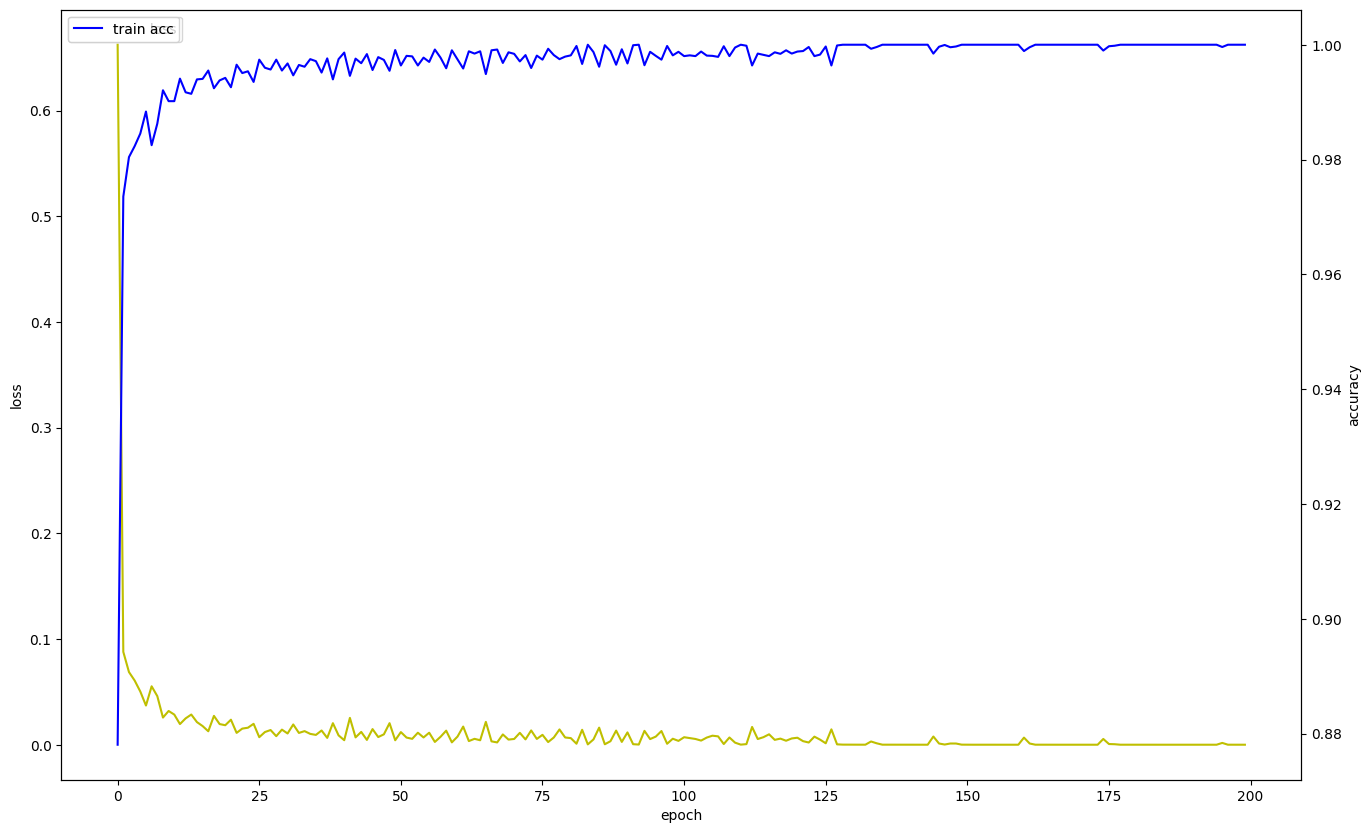

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_3_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# version 4

In [ ]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
print(x_data.shape)
print(y_data.shape)
# x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 265)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), time_stamp, 61)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(25206, 3, 190)
(25206, 18)
(22685, 3, 190) (22685, 18)
(2521, 3, 190) (2521, 18)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                65280     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 18)                594       
                                                                 
Total params: 67954 (265.45 KB)
Trainable params: 67954 (265.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_4_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
708/709 [============================>.] - ETA: 0s - loss: 0.6020 - acc: 0.8820
Epoch 1: val_acc improved from -inf to 0.96351, saving model to sl_model/3/sl_model_14_4_3.h5
709/709 [==============================] - 9s 10ms/step - loss: 0.6015 - acc: 0.8821 - val_loss: 0.1320 - val_acc: 0.9635 - lr: 0.0010
Epoch 2/100
  8/709 [..............................] - ETA: 11s - loss: 0.1620 - acc: 0.9336

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/709 [============================>.] - ETA: 0s - loss: 0.1197 - acc: 0.9625
Epoch 2: val_acc improved from 0.96351 to 0.97898, saving model to sl_model/3/sl_model_14_4_3.h5
709/709 [==============================] - 7s 10ms/step - loss: 0.1196 - acc: 0.9625 - val_loss: 0.0741 - val_acc: 0.9790 - lr: 0.0010
Epoch 3/100
707/709 [============================>.] - ETA: 0s - loss: 0.0756 - acc: 0.9762
Epoch 3: val_acc did not improve from 0.97898
709/709 [==============================] - 7s 9ms/step - loss: 0.0757 - acc: 0.9762 - val_loss: 0.0968 - val_acc: 0.9683 - lr: 0.0010
Epoch 4/100
706/709 [============================>.] - ETA: 0s - loss: 0.0566 - acc: 0.9830
Epoch 4: val_acc did not improve from 0.97898
709/709 [==============================] - 7s 10ms/step - loss: 0.0569 - acc: 0.9829 - val_loss: 0.0842 - val_acc: 0.9786 - lr: 0.0010
Epoch 5/100
709/709 [==============================] - ETA: 0s - loss: 0.0496 - acc: 0.9846
Epoch 5: val_acc improved from 0.97898 to 0.98334, 

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_4_{lags}.h5')

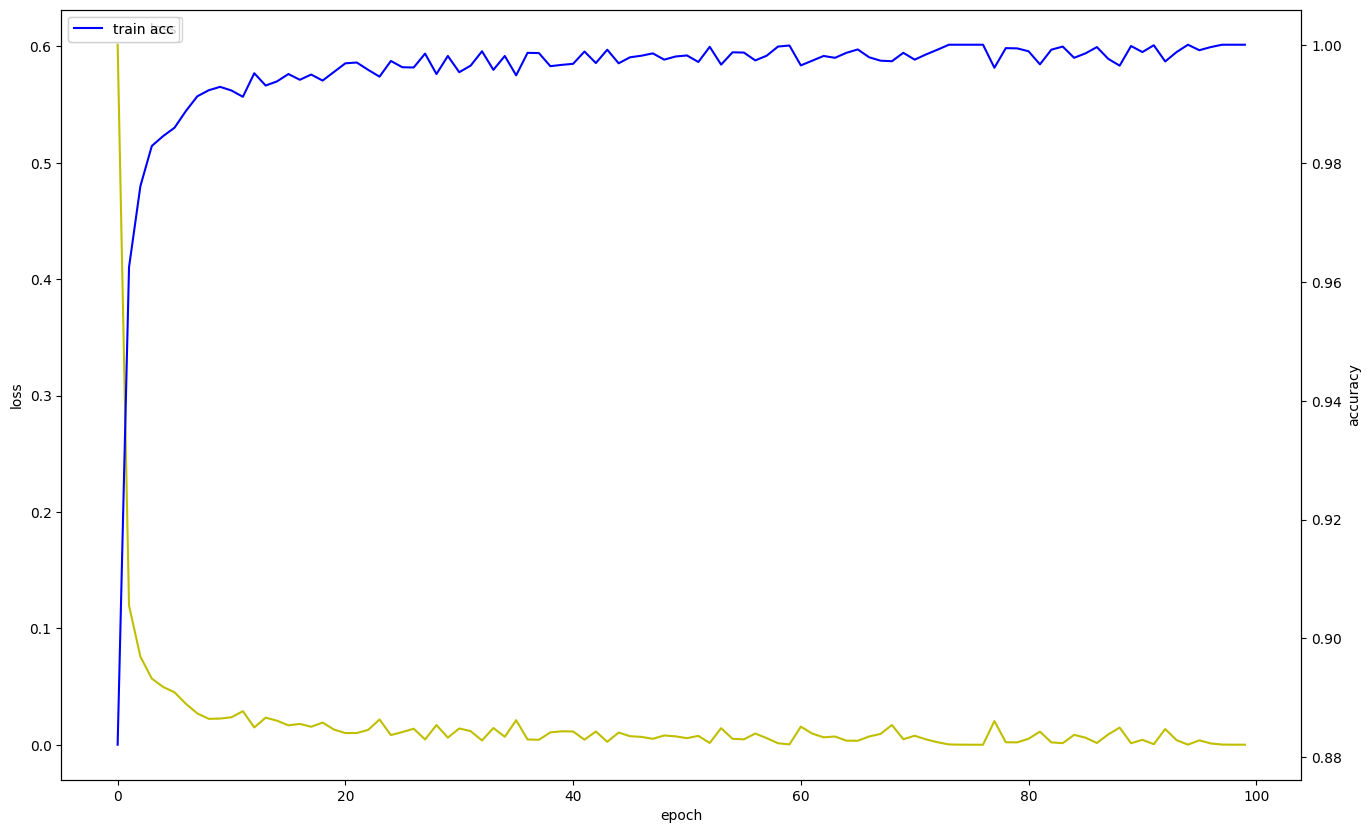

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_4_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# version 5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                65280     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 18)                594       
                                                                 
Total params: 67954 (265.45 KB)
Trainable params: 67954 (265.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_5_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
707/709 [============================>.] - ETA: 0s - loss: 0.4815 - acc: 0.9001
Epoch 1: val_acc improved from -inf to 0.94804, saving model to sl_model/3/sl_model_14_5_3.h5
709/709 [==============================] - 9s 10ms/step - loss: 0.4804 - acc: 0.9002 - val_loss: 0.1516 - val_acc: 0.9480 - lr: 0.0010
Epoch 2/150
 20/709 [..............................] - ETA: 5s - loss: 0.0972 - acc: 0.9750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


707/709 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9768
Epoch 2: val_acc improved from 0.94804 to 0.98056, saving model to sl_model/3/sl_model_14_5_3.h5
709/709 [==============================] - 7s 10ms/step - loss: 0.0784 - acc: 0.9768 - val_loss: 0.0574 - val_acc: 0.9806 - lr: 0.0010
Epoch 3/150
705/709 [============================>.] - ETA: 0s - loss: 0.0598 - acc: 0.9819
Epoch 3: val_acc improved from 0.98056 to 0.98810, saving model to sl_model/3/sl_model_14_5_3.h5
709/709 [==============================] - 7s 9ms/step - loss: 0.0596 - acc: 0.9819 - val_loss: 0.0405 - val_acc: 0.9881 - lr: 0.0010
Epoch 4/150
709/709 [==============================] - ETA: 0s - loss: 0.0435 - acc: 0.9865
Epoch 4: val_acc did not improve from 0.98810
709/709 [==============================] - 7s 10ms/step - loss: 0.0435 - acc: 0.9865 - val_loss: 0.0422 - val_acc: 0.9865 - lr: 0.0010
Epoch 5/150
705/709 [============================>.] - ETA: 0s - loss: 0.0427 - acc: 0.9872


In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_5_{lags}.h5')

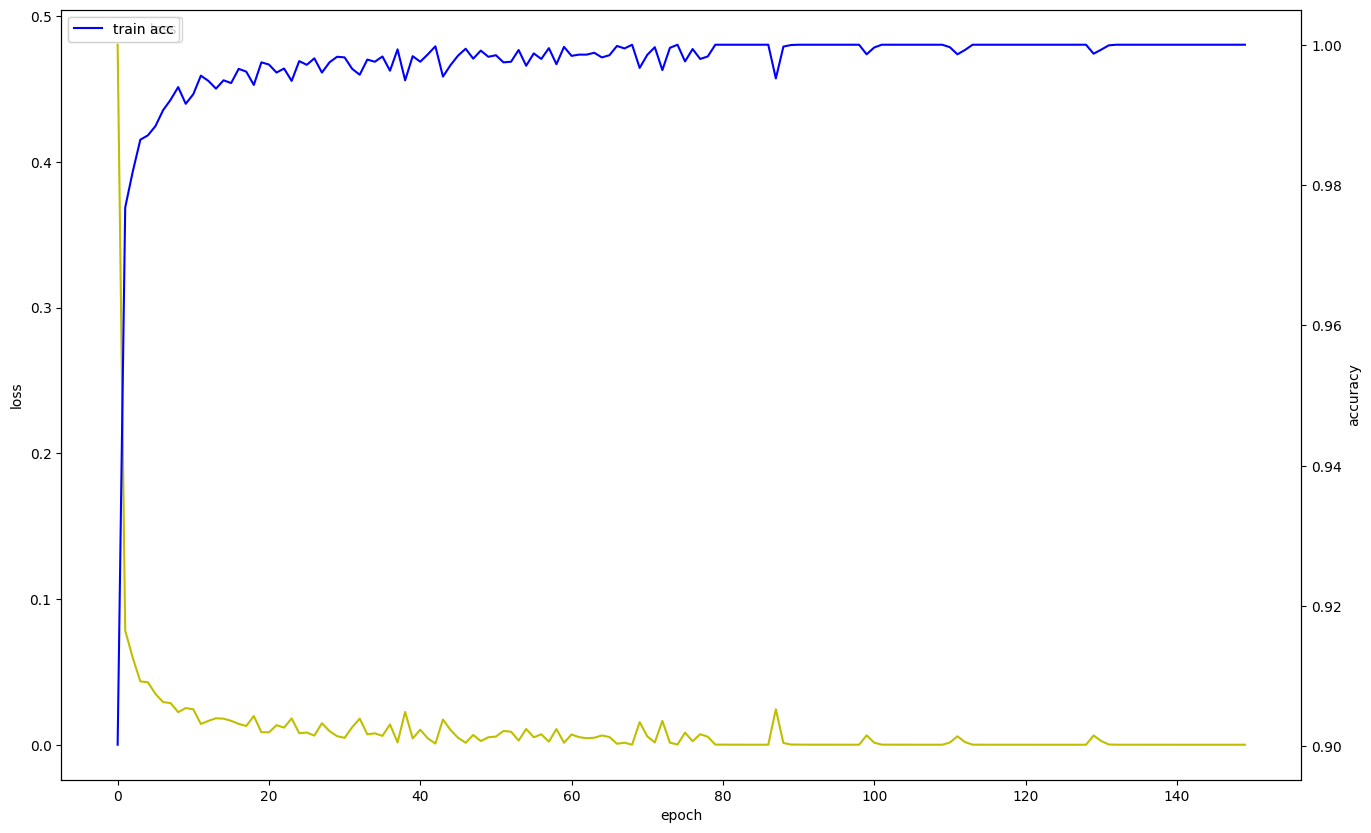

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_5_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# version 6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                65280     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 18)                594       
                                                                 
Total params: 67954 (265.45 KB)
Trainable params: 67954 (265.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{lags}/sl_model_{version}_6_{lags}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
708/709 [============================>.] - ETA: 0s - loss: 0.5454 - acc: 0.8819

KeyboardInterrupt: ignored

In [ ]:
model.save(f'{model_save_root}{lags}/sl_model_v{version}_6_{lags}.h5')

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [ ]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{lags}/sl_model_v{version}_6_{lags}.tflite', 'wb') as f:
  f.write(tflite_model)